# A data-driven statistical model for predicting the critical temperature of a T superconductor

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [57]:
#loading dataset
df_data=pd.read_csv('train.csv')

In [64]:
df_data.shape

(21263, 82)

In [58]:
df_data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [59]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [65]:
df_data.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


### Feature Selection with Correlation

In [67]:
df_data.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


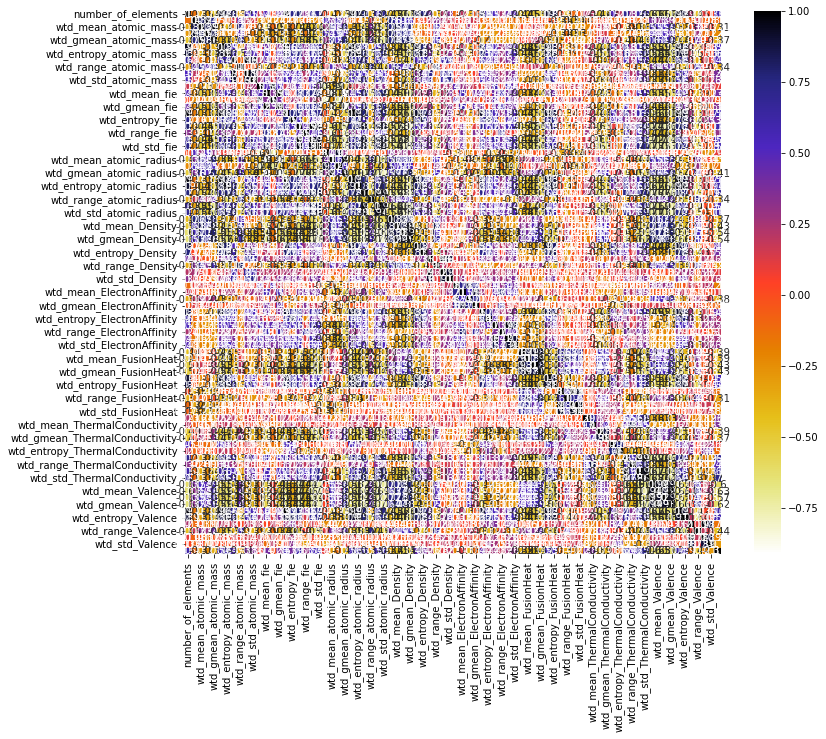

In [88]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [93]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [96]:
corr_features = correlation(df_data, 0.7)
len(set(corr_features))

67

In [97]:
corr_features

{'critical_temp',
 'entropy_Density',
 'entropy_ElectronAffinity',
 'entropy_FusionHeat',
 'entropy_Valence',
 'entropy_atomic_mass',
 'entropy_atomic_radius',
 'entropy_fie',
 'gmean_Density',
 'gmean_ElectronAffinity',
 'gmean_FusionHeat',
 'gmean_Valence',
 'gmean_atomic_mass',
 'gmean_atomic_radius',
 'gmean_fie',
 'mean_Density',
 'mean_Valence',
 'mean_atomic_radius',
 'range_Density',
 'range_ThermalConductivity',
 'range_atomic_radius',
 'range_fie',
 'std_Density',
 'std_ElectronAffinity',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'std_Valence',
 'std_atomic_mass',
 'std_atomic_radius',
 'std_fie',
 'wtd_entropy_Density',
 'wtd_entropy_ElectronAffinity',
 'wtd_entropy_FusionHeat',
 'wtd_entropy_ThermalConductivity',
 'wtd_entropy_Valence',
 'wtd_entropy_atomic_mass',
 'wtd_entropy_atomic_radius',
 'wtd_entropy_fie',
 'wtd_gmean_Density',
 'wtd_gmean_ElectronAffinity',
 'wtd_gmean_FusionHeat',
 'wtd_gmean_ThermalConductivity',
 'wtd_gmean_Valence',
 'wtd_gmean_atomic_mass

In [103]:
df=df_data.drop(corr_features,axis=1)
df=df_data.drop(corr_features,axis=1)

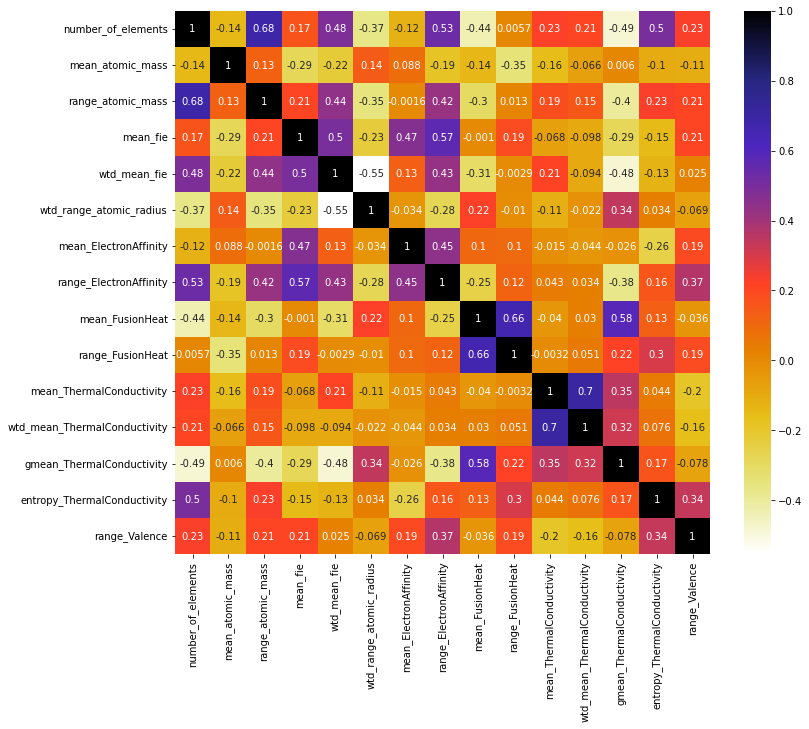

In [104]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [107]:
#x nd y define
x=df_data.drop(['critical_temp'],axis=1).values
y=df_data['critical_temp'].values

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [119]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR_CT=LR.fit(x_train,y_train)


In [120]:
y_predict=LR.predict(x_test)
print(y_predict)

[74.28117891 69.33103139 18.14317894 ... 23.31974799  5.40333875
 75.50970251]


In [121]:
LR.coef_

array([-3.06938343e+00,  8.43508961e-01, -9.43372470e-01, -5.20469364e-01,
        7.03010235e-01, -3.67201853e+01,  3.22415938e+00,  1.97777512e-01,
        1.61603765e-02, -5.21410115e-01,  1.00952426e-01,  1.08855980e-01,
       -1.85313051e-01, -9.99804957e-02,  2.04002777e-01, -1.24441568e+02,
        4.16613810e+01,  7.29139442e-02,  2.05693251e-02, -2.08469347e-01,
       -2.23908332e-02, -4.05802994e-01,  3.17771348e+00,  7.04874356e-02,
       -2.79324559e+00,  8.21841529e+01,  4.56990513e+01,  1.75491266e-01,
       -8.60156386e-02, -3.27360616e-01, -3.07931107e-01, -4.46732675e-03,
       -2.06575069e-04,  1.20613811e-03,  2.04123456e-03,  1.66860928e+01,
       -1.99703712e+01, -1.45289069e-03,  1.01021746e-04,  5.94578489e-03,
       -1.84645808e-03, -1.12918682e-01,  5.38856991e-01,  1.85171388e-01,
       -5.94408102e-01,  3.75984106e+00, -2.08168324e+01, -3.53516344e-01,
       -1.27132657e-01,  1.19395928e+00, -5.41975659e-01,  1.65337611e+00,
       -1.83186129e+00, -

In [122]:
LR.intercept_

-18.52343223724761

In [123]:
LR.predict([[4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.6225345301219,775.425,1010.26857142857,718.15289995213,938.016780052204,1.30596703599158,0.791487788469155,810.6,735.985714285714,323.811807806633,355.562966713294,160.25,105.514285714286,136.126003095455,84.528422716633,1.25924397214289,1.20703998701461,205,42.9142857142857,75.2375404967494,69.2355694829807,4654.35725,2961.50228571429,724.953210852388,53.5438109235142,1.03312880053102,0.814598190091683,8958.571,1579.58342857143,3306.1628967555,3572.59662370838,81.8375,111.7271429,60.12317856,99.41468205,1.159686593,0.787381691,127.05,80.98714286,51.43371189,42.55839575,6.9055,3.846857143,3.479474849,1.040985986,1.088575342,0.994998193,12.878,1.744571429,4.599064117,4.666919554,107.756645,61.01518857,7.06248773,0.621979487,0.30814799,0.262848266,399.97342,57.12766857,168.8542438,138.5171625,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059]])

array([30.51001133])

In [124]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7386576626075416

In [125]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_predict)

13.406080322073773

In [126]:
from math import sqrt

print("RMSE: " + str(round(sqrt(mean_squared_error(y_test,y_predict)),3)))

RMSE: 17.531


In [128]:
#ordinary least squares
least_square=sm.OLS(y_train,x_train).fit(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

In [129]:
print(least_square.params)

[-3.06317120e+00  8.45970051e-01 -9.65333887e-01 -5.31259089e-01
  7.19637743e-01 -3.39923960e+01  3.30376748e+00  1.99967249e-01
  1.77379752e-02 -5.15353546e-01  9.25483555e-02  1.34504980e-01
 -2.35706058e-01 -1.34804328e-01  2.50268764e-01 -1.19504336e+02
  4.20580999e+01  7.45851845e-02  1.94651761e-02 -2.22171925e-01
 -6.91825440e-03 -4.23366694e-01  3.19375095e+00  6.11259892e-02
 -2.83366676e+00  7.45451279e+01  4.62435361e+01  1.79486071e-01
 -7.86869949e-02 -3.44293644e-01 -3.06444683e-01 -4.33379640e-03
 -1.82976659e-04  1.20852018e-03  2.19293607e-03  1.52363011e+01
 -1.95399970e+01 -1.43255986e-03  7.84271352e-05  5.84367180e-03
 -1.64676518e-03 -9.90642430e-02  5.35442079e-01  1.75529234e-01
 -5.92063225e-01  3.40423818e+00 -2.07138807e+01 -3.55372366e-01
 -1.22920807e-01  1.19587475e+00 -5.46154637e-01  1.68009827e+00
 -1.81557725e+00 -1.44048853e+00  1.43758032e+00 -2.05223176e+01
  2.57925610e+01 -3.23815200e-01  6.71346337e-01 -6.35156588e-01
  6.06974850e-01 -9.21661

In [130]:
#summary
least_square.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.868      
Dependent Variable:     y                AIC:                         127755.2884
Date:                   2022-10-16 19:43 BIC:                         128371.5398
No. Observations:       14884            Log-Likelihood:              -63797.    
Df Model:               81               F-statistic:                 1206.      
Df Residuals:           14803            Prob (F-statistic):          0.00       
R-squared (uncentered): 0.868            Scale:                       311.09     
-------------------------------------------------------------------------------------
              Coef.       Std.Err.        t         P>|t|        [0.025       0.975] 
-------------------------------------------------------------------------------------
x1            -3.0632       0.9024      -3.3944     0.0007       -4.8320      -1.2943
x2             0.8460       0.0995       8.5002     0.0000        0.6509       1.0410
x3            -0.9653       0.1238      -7.7966     0.0000       -1.2080      -0.7226
x4            -0.5313       0.0989      -5.3711     0.0000       -0.7251      -0.3374
x5             0.7196       0.1178       6.1093     0.0000        0.4887       0.9505
x6           -33.9924       5.4756      -6.2080     0.0000      -44.7252     -23.2596
x7             3.3038       4.3552       0.7586     0.4481       -5.2330      11.8405
x8             0.2000       0.0198      10.1225     0.0000        0.1612       0.2387
x9             0.0177       0.0262       0.6777     0.4980       -0.0336       0.0690
x10           -0.5154       0.0757      -6.8110     0.0000       -0.6637      -0.3670
x11            0.0925       0.0657       1.4078     0.1592       -0.0363       0.2214
x12            0.1345       0.0754       1.7841     0.0744       -0.0133       0.2823
x13           -0.2357       0.0910      -2.5893     0.0096       -0.4141      -0.0573
x14           -0.1348       0.0740      -1.8211     0.0686       -0.2799       0.0103
x15            0.2503       0.0901       2.7789     0.0055        0.0737       0.4268
x16         -119.5043      24.3053      -4.9168     0.0000     -167.1458     -71.8629
x17           42.0581       5.7434       7.3229     0.0000       30.8004      53.3158
x18            0.0746       0.0077       9.7183     0.0000        0.0595       0.0896
x19            0.0195       0.0044       4.4649     0.0000        0.0109       0.0280
x20           -0.2222       0.0266      -8.3615     0.0000       -0.2743      -0.1701
x21           -0.0069       0.0243      -0.2848     0.7758       -0.0545       0.0407
x22           -0.4234       0.2185      -1.9376     0.0527       -0.8517       0.0049
x23            3.1938       0.2919      10.9414     0.0000        2.6216       3.7659
x24            0.0611       0.2186       0.2797     0.7797       -0.3673       0.4895
x25           -2.8337       0.2851      -9.9393     0.0000       -3.3925      -2.2748
x26           74.5451      21.0711       3.5378     0.0004       33.2432     115.8471
x27           46.2435       6.3771       7.2515     0.0000       33.7436      58.7434
x28            0.1795       0.0264       6.7916     0.0000        0.1277       0.2313
x29           -0.0787       0.0190      -4.1311     0.0000       -0.1160      -0.0414
x30           -0.3443       0.1181      -2.9158     0.0036       -0.5757      -0.1128
x31           -0.3064       0.1064      -2.8788     0.0040       -0.5151      -0.0978
x32           -0.0043       0.0006      -7.2707     0.0000       -0.0055      -0.0032
x33           -0.0002       0.0007      -0.2506     0.8021       -0.0016       0.0012
x34            0.0012       0.0006       2.1345     0.0328        0.0001       0.0023
x35            0.0022       0.0007       3.1518     0.00

In [132]:
y_predict_test=least_square.predict(x_test)

In [134]:
y_predict_test

array([74.47975277, 69.33432522, 17.65065961, ..., 23.58833443,
        6.02024613, 75.44075176])

Text(0.5, 1.0, 'Actual vs. Predicted')

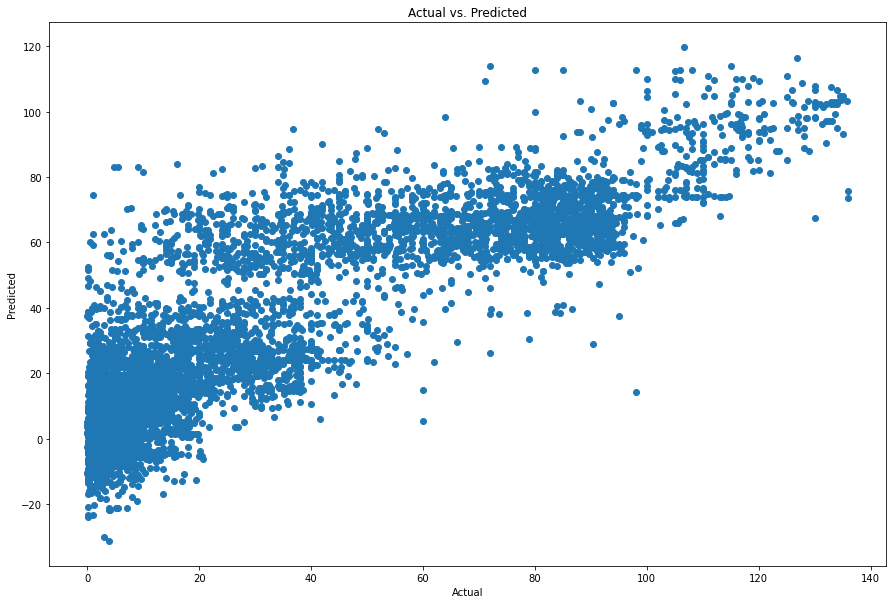

In [127]:
print(least_square.params)import matplotlib.pyplot as plot
plot.figure(figsize=(15,10))
plot.scatter(y_test,y_predict)
plot.xlabel('Actual')
plot.ylabel('Predicted')
plot.title('Actual vs. Predicted')

In [38]:
pred_y_data=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_predict,'Difference':y_test-y_predict})
pred_y_data[0:20]

,Actual Value,Predicted value,Difference
0,85.00,73.711315,11.288685
1,85.50,69.412804,16.087196
2,11.60,18.054412,-6.454412
3,16.00,56.414767,-40.414767
4,107.00,76.625806,30.374194
5,10.00,-4.683086,14.683086
6,4.60,8.925484,-4.325484
7,10.80,20.759761,-9.959761
8,11.00,-7.015177,18.015177
9,90.80,73.487444,17.312556
